# Clustering

## Overview

Clustering is about finding groups of related objects within instances. Consider the following example. 

<img src="images/clustering_general.png" alt="Example for Clustering" style="width: 500px;"/>

On the left side are a lot of emoticons, which are objects. Clustering takes all these objects and separates them into groups. Above, we have two groups: one with happy emoticons and one with sad emoticons. The groups are created based on the features of the objects, no other information is used. To get a separation into happy and sad emoticons, the features must reflect the emotion. If the features would, e.g., reflect the colors, the clustering algorithm would separate the smilies into yellow and orange emoticons. If the features would reflect the degree of facial hair, the clustering algorithm would separate the emoticons into those with no beard and those with a moustache. A bit more abstract, clustering can be described as follows. 

<img src="images/clustering_abstract.png" alt="Clustering in general" style="width: 500px;"/>

Thus, we just have objects and a clustering algorithm that determines groups of related objects as result. What we do not know without inspection of the clusters is what exactly the relationship between the objects in a group is. 

### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} = \{\phi(o): o \in O\}$. For clustering, the feature space is usually numeric, i.e., $\mathcal{F} \subseteq \mathbb{R}^d$. The grouping of the objects is described by a map $c: \mathcal{F} \to G$ with $G =\{1, ..., k\}$ and $k \in \mathbb{N}$ the number of clusters. 

### Measuring Similarity

Clusters are groups of *similar* objects. Consequently, the definition of similarity is central to clustering. The approach for clustering is simple: similar means that there is a short *distance* between objects in the feature space. There are different ways to measure distances, as any well-defined metric can be used. In the following, we present the three most commonly used metrics. 

#### Euclidean Distance

By far the most common distance measure is the *euclidean distance*. The euclidean distance is the direct line between two points.

<img src="images/euclidean.png" alt="Euclidean Distance" style="width: 100px;"/>

The euclidean distance is based on the euclidean norm $||\cdot||_2$ and defined as

$$d(x,y) = ||y-x||_2 = \sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}.$$

#### Manhatten Distance

Another common distance measure is the *Manhatten distance*, also known as taxi-cab norm. The name of the norm comes from the grid of the streets in Manhatten, that is mostly organized in an axis parallel way. Thus, if you want to travel between two points, you cannot use the diagonal.

<img src="images/manhatten.png" alt="Manhatten Distance" style="width: 100px;"/>

The Manhatten distances is based on the Manhatten norm $||\cdot||_1$ and defined as

$$d(x,y) = ||y-x||_1 = |y_1-x_1|+...+|y_n-x_n|.$$

#### Chebyshev Distance

The *Chebyshev distance* is another common distance measure. The Chebyshev distance is also known as maximum metric and  Chessboard distance. This is because the Chebychev distance is the same as the number of moves that the King in the game of chess needs to reach a certain field. 

<img src="images/chebyshev.png" alt="Chebyshev Distance" style="width: 100px;"/>

Thus, the value of the Chebychev norm is maximum of the distances in any direction. The Chebyshev distance is based on the maximum norm $||\cdot||_\infty$ and defined as

$$d(x,y) = ||y-x||_\infty = \max_{i=1, ..., n} |y_1-x_1|.$$

### Evaluation of Clustering Results

The evaluation of clustering results is a bit different from the evaluation of the other categories of algorithms. The reason for this is that there are no generic criteria. Instead, the criteria depend on the clustering algorithm and the use case. 

Each clustering algorithm comes with its own approach for finding related objects, i.e., its own concept of similarity. Consequently, how good the clusters match the data, such that the data within the clusters is really similar to each other, depends on the definition of similarity used by the clustering algorithm. We will discuss such criteria together with algorithms. 

The importance of the use case can be seen using the emoticon example above. If we are interested in emotion, we have a perfect grouping. If we, on the other hand, want to identify emoticons from different sets of emoticons, the clusters should be the orange ones and the yellow ones. Unfortunately, such aspects cannot be measured by generic metrics. Instead, the data scientists, possibly together with domain experts, must analyze the meaning of the clusters in depth. Criteria for such a manual analysis may be if the number of clusters is reasonable, if the objects within a cluster seem similar to domain experts, or if all similar objects are within the same cluster. Unfortunately, such a manual analysis can be very difficult, especially if the data is very large, there are many clusters, or the data has many different features and thus a high dimension. 

### Cities and Houses

We use a running analogy to explain the concepts behind the clustering algorithms. The analogy is quite simple: instead of objects, the analogy uses "houses", and instead of clusters, the analogy uses "cities". The analogy works nicely, because you do not need to know to which city a house belongs and do not even need to know how many cities there are, to see if a house belongs to the same city as other houses.  This is the same problem, we try to solve with clustering. We do not know to which cluster objects belong and how many clusters there are, but want to use an algorithm that can infer this. 

## $k$-Means Clustering

### General Idea

When we think about how we can define cities, we may do so by using the town halls as reference points. A simple concept would be to say that each house belongs to the city, whose town hall is closest. This is the essence of of the $k$-Means algorithm: we describe clusters by their *center*. These centers are also called *centroids* and $k$-means is an example for *centroid-based clustering*. 

If we want to know to which cluster an instance belongs, we just look for the closest center. The $k$ defines the number of clusters. Formally, we have cluster centers $C_1, ..., C_k \in \mathcal {F}$ and a distance metric $d$. We can determine the cluster of any instance $x \in \mathcal{F}$ as 

$$c(x) = argmin_{i=1,...,k} d(x, C_i).$$

The following figure visualizes how data is divided into $k=4$ clusters. The centers are shown by the large grey points, the colors indicate to which cluster each instance belongs. 

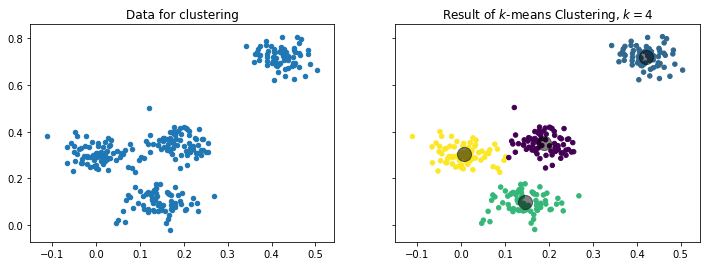

In [26]:
# we need matplotlib for plotting
import matplotlib.pyplot as plt
# we use sklearn to generate data and for the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate sample data, the _ means that we ignore the second return value
X, _ = make_blobs(n_samples=300, centers=4, center_box=(0, 1),
                  cluster_std=0.04, random_state=1)

# we fit a k-means model with four clusters
# then we predict for each point to which cluster it belong
# finally, we determine the location of the cluster centers
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# now we plot the data and the clustering results
f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20)

axes[1].set_title('Result of $k$-means Clustering, $k=4$')
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

This concept is simple, effective, and also intuitive. 

### The Algorithm

The algorithm to determine the best location for the centers extends this concept. Consider that you have a city. The "best" location for the town hall would be such that the distances between the houses of the city and the town hall is minimized. Now imagine that a couple of new houses are built in the town, while some older ones are destroyed. This means that the location of the town hall should be changed, such that it minimizes the distances again. Of course, this does not happen in real-life, but the concept can be used to define the algorithm to determine the clusters with the $k$-means algorithm. 

Let $X \subset \mathcal{F}$ be our data. We can determine clusters with $k$-Means as follows. 

1. Select initial centroids $C_1, ..., C_k \in \mathcal{F}$. 
2. Determine the clusters $X_i = \{x \in X: c(x) = i\}$ for $i=1,...,k$. 
3. Update centroid such that the location of the centroid is the arithmetic mean of the objects assigned to the clusters such that $C_i = \frac{1}{|X_i|} \sum_{x \in X_i} x$.
4. Repeat steps 2 and 3 until
  - Convergence, i.e., the clusters $X_i, i=1,...,k$ do no change anymore.
  - A predefined maximum number of iterations is reached.
  
While this may seem abstract, the concept becomes clear when we look at the visualization below. 

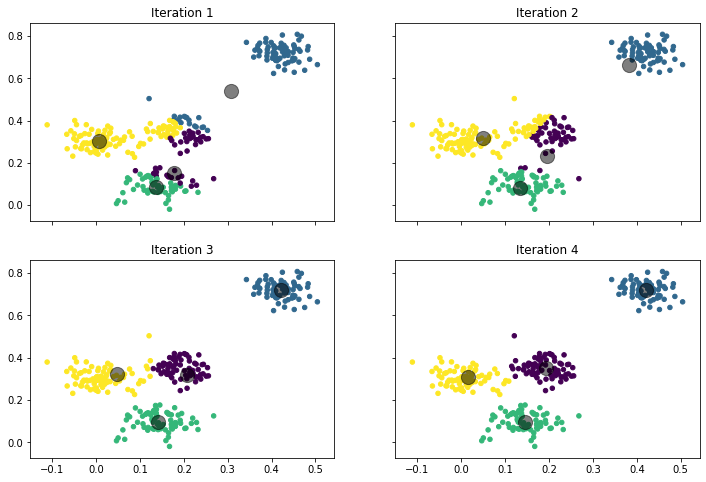

In [2]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

# run the algorithm with k=1,...,4 iterations to demonstrate how it converges
for iter in range(1,5):
    kmeans = KMeans(n_clusters=4,max_iter=iter, n_init=1, init='random', random_state=5)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-2)), (iter-1)%2]
    ax.set_title('Iteration %i' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

This is what happens: 

- Iteration 1: Iteration 1 shows the starting position. We start with random cluster locations. One center is actually far away from any data point. The color indicates the initial cluster assignment. We can see that the top-right center gets all the instances in the top-right corner and some instances in the middle (teal). The leftmost center gets the points on the left side and some from the center (yellow). At the bottom-middle, we have two clusters close to each other which split the points at the bottom (purple and green). Purple also get some points in from the middle. 
- Iteration 2: We update the cluster centers and they are moved to the location of the arithmetic mean of the cluster assignments in iteration 1. This means that the teal center moves to the top-right corner, because most points assigned to the cluster are from that area, only some points are from the middle. The teal center is still not located in the middle of the top-right cluster, because of the influence of the points from the middle on the update of the location. However, due to this update, no points from the middle are assigned to the teal cluster anymore. The interaction between yellow, purple, and green is quite interesting. The yellow center moves slightly to the right, because many points from the middle were assigned. The purple cluster moves a bit to the top, because of the points from the middle. The green center stays almost where it was. However, while yellow and purple both moved towards the middle, yellow actually as fewer points assigned, because the move of purple towards the middle was larger. Moreover, while green did not change, most of the bottom cluster is now green, because purple moved to the center. 
- Iteration 3: The result begins to converge. Teal is now in the center of the top-right cluster. Yellow starts to move towards the left side, because purple dominates the instances in the middle. As a consequence, green gains full control over the bottom cluster. 
- Iteration 4: After only four update cycles, we have almost the final result we have shown above. Teal, purple, and green do not move a lot anymore. Yellow is still moving to the left, but has now also almost reached the final destination. 

### Selecting $k$

In the example above, we always used $k=4$, i.e., four clusters. This is an imporant aspect of the $k$-Means algorithm: how to pick a suitable value for $k$? Before we explore this in greater detail, let us look at how the result with different values for $k$ for our sample data. 

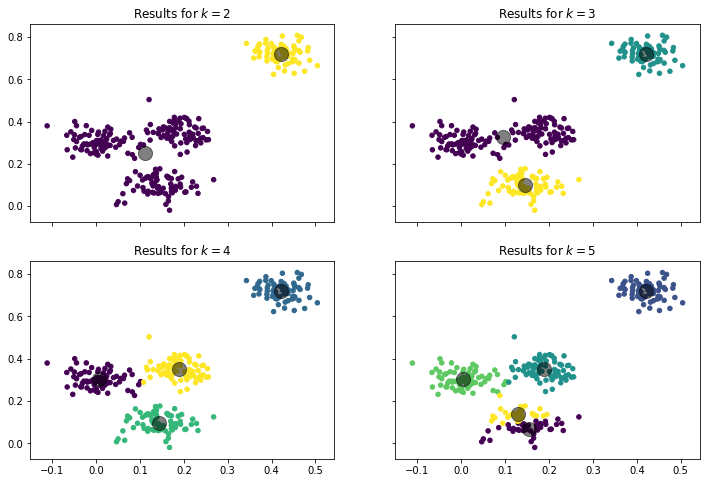

In [3]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

k = range(2,6)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    ax = axes[min(1,max(0, iter-3)), (iter)%2]
    ax.set_title('Results for $k=%i$' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

With $k=2$ we get a single large cluster and one smaller cluster. With $k=3$ the large cluster is split in two, and we have one cluster at the top-right, one at the bottom, and one in the middle of the plot. With $k=4$ the middle cluster is further split into two and we have one in the middle of the plot and one on the right side. With $k=5$ the bottom cluster is also split in two and now has a top and a bottom half. We can argue that the results for $k=2, 3, 4$ all make sense. We could argue that $k=2$ is best, because there is a large gap between the instances on the top-left and the others, and there is no other gap that large. We could also say that $k=3$ is best, because there is a small gap between the bottom cluster and the points in the middle, and there is no such gap between the points in the middle. We could also say that $k=4$ is best, because here all clusters are roughly equally dense and have a similar shape. However, for $k=5$, we cannot really argue that this would be best. The split of the group at the bottom just does not make sense. 

This is a general observation for clustering: without knowing the meaning of instances, we cannot really say which result is best, because often multiple results may make sense. Which is best depends on the use case and the data. In general, there are several aspects that influence the selection of $k$. 

- The domain knowledge about the use case and the data. Knowledge about the domain can help to determine data within a cluster is really similar and also if different clusters are really not similar to each other. If you determine based on domain knowledge that clusters are not internally similar, you need to increase $k$. If you determine that similar objects are in different clusters, you should decrease $k$. The use case may also prescribe a fixed number of clusters that must be the outcome. For example, if a binary separation of the data into two groups must be achieved, $k$ must be set to two. 
- Visualizations are a great tool to see how clear the separation, how big the gaps between clusters are, and how the data in the clusters is spread out. Visualization is the means for identifying good values of $k$ we used above. 
- There is also a more analytical approach for the selection of $k$ based on the *Within-Sum-of-Squares* (WSS). To understand WSS, we must revisit the algorithm of $k$-Means. The update step sets the centers such that they are located at the arithmetic mean of the cluster points. Thus, the update step minimizes the *intra-cluster variance*. The variance is the square of the standard deviation and calculated by the dividing the sum of the squared distances from the arithmetic mean, divided by the number of instances in the cluster. Since the arithmetic mean is our center, the variance of the instances in a cluster is the sum of the squared distances from the center, divided by the number of instances in the cluster. Thus, the update step of $k$-means actually minimizes the *sum of squared* distances *within* a cluster. Based on this, WSS more or less measures how good $k$-means is at minimizing the intra-cluster variance by computing the squared distances of each instance from the respective cluster center: 

$$WSS = \sum_{i=1}^k\sum_{x \in X_i} d(x, C_i)^2$$

We already discussed how good the different values of $k$ are based on visualization. There is no domain knowledge we could use for randomly generated data. What is missing is an evaluation of the WSS of the example. The plot below shows the WSS for $k=2, ..., 5$. 

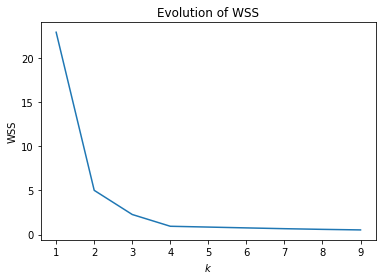

In [5]:
inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

We can see that there is strong decrease in the WSS from 2 to 3 and 3 to 4. There is almost no decrease for values larger than 4. We see that the slope of the WSS changes at both 2, 3, 4. Such changes in slope are called *elbows*, because they look a bit like an arm bent at the elbow. Elbows are the interesting values of $k$. Thus, from the WSS the values $k=2, 3, 4$ would all be reasonable. For $k>4$ the WSS does not decrease a lot anymore and there are no elbows which means that there is no improvements and these are not good values. 

The WSS is monotonic-decreasing in $k$. This means that $WSS(k+1) \leq WSS(k)$ for all $k>1$. Consequently, we cannot just pick the minimum, as this would just be the number of instances, i.e., $k=|X|$. The reason for this is, that the variance is always decreasing if we add more centers. This is minimal if $d(x, C_{c(x)})=0$ for all $x \in X$, which can only be achieved with |X| clusters, assuming that there are no duplicate values in $X$. However, if the variance is already small, the decrease will be small, possibly even zero. This is what we observe for $k>4$ in our example. Thus, we can easily determine reasonable values of $k$ visually, but not automatically by minimizing WSS. 

### Problems of $k$-Means

Even though the concept of $k$-Means is simple, the algorithm often works well. However, there are several problems with $k$-Means that you should be aware of. 

- $k$-Means is sensitive to the initial clusters. The results may not be stable and change with different start centers. Consequently, $k$-Means should be run with multiple randomized start centers. If the results are unstable, this is a strong indicator that the outcome may not be good for the given number of clusters $k$. 
- An unsuitable value of $k$ may lead to bad results. Since $k$ must be picked manually, this means that experience is important when using the $k$-Means algorithm, to avoid bad results due to a wrong number of clusters. 
- All features must have a similar range of values, ideally even the same range of values. Otherwise, differences in the ranges of the scales may introduce artificial weights between features. For example, consider data with two features: age in years and the yearly income in Euro. The age is (roughly) between 0 and 100, the income in Euro is - even for low paying jobs, already at 12*400=4,800 Euro, but can also easily be above 50,000 Euro. This means that, when we calculate the distance between two instances, the age is irrelevant, all that matters is the income. Thus, the large range of the income scale means that the income has a higher weight and a stronger influence on the results. 
- Because the cluster assignment is based on the distance, clusters tend to be round. Clusters that are not roughly round can often not be described well by centroids. An example are the half-moons below. We can clearly see that there are two half-circles and each one is a cluster. $k$-Means cannot find these clusters, because they are not round. 

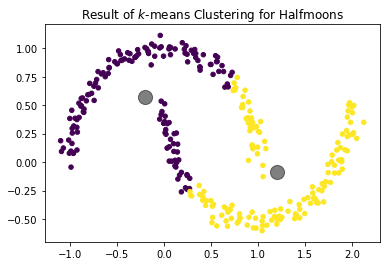

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons
from sklearn.cluster import KMeans

# this generates our halfmoon data
X,_ = make_moons(n_samples=300, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure()
plt.title('Result of $k$-means Clustering for Halfmoons')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

## EM Clustering

### General Idea

Another way to look at cities and houses is to think of them as random variables. The assignment of houses to cities is then guided by probability distributions. This is an extension of the idea behind $k$-Means. Our town hall is still the same, i.e., the center. However, we acknowledge that houses closer to the town hall are more likely to belong the the city than houses that are farther away. We actually go one step further and define cities not only based on the location of the town hall, but also by the variability of the houses, i.e., how spread out the houses of the cities are. This concept is called *distribution-based clustering*. 

Formally, we have a number of clusters $k$ that are described by random variables $C_1, ..., C_k$. We can calculate the probability that an instance belongs to a cluster $P(C_i = x), i=1,...,k$. Each instance is assigned to the *most likely* cluster, i.e., the cluster $C_i$ where the $P(C_i = x)$ is maximized. Consequently, our clustering is defined as 
$$c(x) = \max_{i=1,..., k} P(C_i = x).$$

While this concept generally works with any probability distribution, we only use normally distributed random variables to describe the clusters in the following. This is also known as *Gaussian Mixture Model*. Please note that these normal distributions are multivariate, i.e., not just for one dimension, but for as many dimensions as we have features. A univariate normal distribution is described by the mean value and the standard deviation. In comparison, a multivariate normal distribution is described by a vector of mean values and a *covariance matrix*. The covariances describe the relationship between the variances in the different dimensions. A bit simplified, you can think of the covariances as the stretching of the bell-shape of the normal distribution in the different directions. Mathematically, the covariances describe an ellipse. One aspect that is important for us that the covariance matrix is square matrix. Thus, if we have $d$ features, there are $d+d^2$ parameters that describe the multivariate normal distribution, $d$ mean values and a $d\times d$ covariance matrix. This means that we have $k(d+d^2)$ parameters when we want to describe $k$ clusters. 

The following figure shows an example for the result of EM clustering with $k=4$ normal distributions fit to the same data we already used to show how $k$-Means works. The mean values are shown by the large gray points, the covariances by the colored ellipses. 

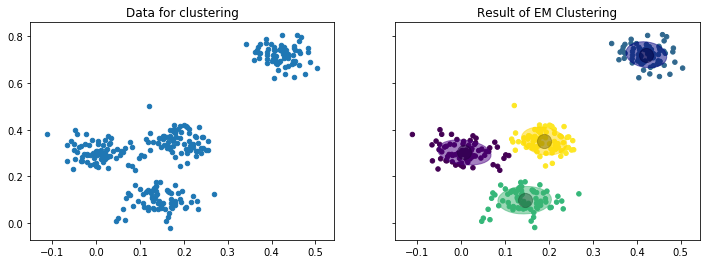

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

# we silence some annyoing warnings
# if something is not working properly, remove this part and restart the kernel
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

colors = ['indigo', 'navy', 'mediumseagreen', 'gold']

rs = 2

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)


em = GaussianMixture(n_components=4,random_state=rs)
em.fit(X)
y_em = em.predict(X)
centers = em.means_

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20);

axes[1].set_title('Result of EM Clustering')
axes[1].scatter(X[:, 0], X[:, 1], c=y_em, s=20)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
ax = axes[1]
for n, color in enumerate(colors):
    v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
plt.show()

While the concept of clustering with random variables as clusters is a bit more complex, the figure already shows the advantage: because we do not just have the mean value, but also the covariances, the clusters also describe how they are *spread*. Thus, we have more information about the data encoded in the cluster. 

### The Algorithm

This type of clustering is called EM clustering because of the algorithm used to determine the parameters of the clusters is called the *Expectation-Maximization algorithm*. The algorithm is in general similar to the $k$-Means algorithm we already know: we start with randomly initialized clusters and then iteratively update the clusters to better match the data. For the EM algorithm, the initialization means random mean values and random covariance matrices. Updates mean that the mean values and covariances are updated such that the *likelihood* that the data can be explained by the clusters is increased. We do not discuss the complete mathematical description of the EM algorithm, but rather look at a simplified version, where we update only the mean values and ignore the updates of the covariances. 

1. Randomly select initial normal distributions $C_1 \sim (\mu_1, \Sigma_1), ..., C_k \sim (\mu_k, \Sigma_k)$ with $\mu_i \in \mathcal{F}$ the mean values and $\Sigma_i \in \mathcal{F}\times\mathcal{F}$ the covariance matrices.
2. Expectation Step: Determine weights $$w_i(x) = \frac{p(x|\mu_i, \Sigma_i)}{\sum_{j=1}^k p(x|\mu_j, \Sigma_j)}$$ for all $x \in X$. 
3. Maximization Step: Update mean values as
$$\mu_i = \frac{1}{|X|}\sum_{x \in X} w_i(x)\cdot x$$
4. Repeat steps 2 and 3 until
  - Convergence, i.e., the clusters $C_i, i=1,...,k$  do no change anymore.
  - A predefined maximum number of iterations is reached.

The biggest difference between the EM algorithm and the $k$-Means algorithm are the weights. The weights specify the likelihood that an instance $x \in X$ belongs a specific cluster. For example, if $w_i(x)=0.9$ it means that the likelihood is that $x$ belongs to cluster $C_i$ is 90%. The cluster assignment follows the same rule as above, i.e., $x$ is assigned to the cluster that maximizes the weight $c(x) = max_{i=1, ..., k} w_i(x)$. Still, EM also allows insights if points are uncertain, i.e., multiple clusters have similar likelihoods. This is called *soft clustering*, because theoretically each point does not belong to a single cluster, but to all clusters with a certain likelihood. 

To better understand how the EM algorithm works, we again look at how the update steps work to fit the data.

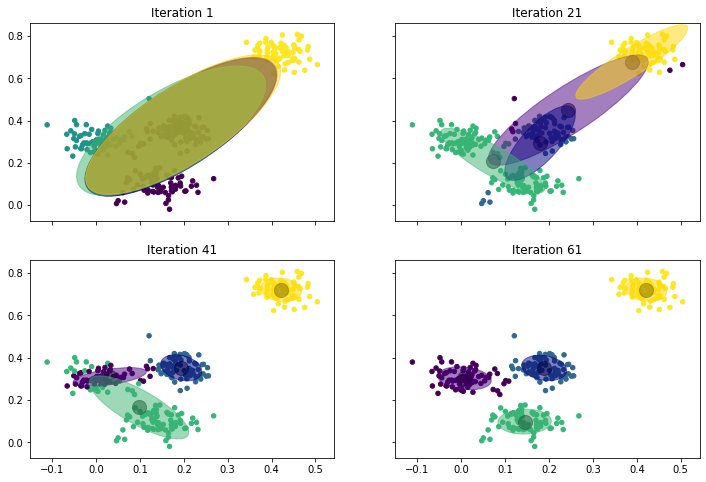

In [32]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

for iter in range(0,4):
    cur_iter = iter*20+1
    em = GaussianMixture(n_components=4,random_state=rs+3, max_iter=cur_iter, init_params='random')
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    ax = axes[min(1,max(0, iter-1)), (iter)%2]
    ax.set_title('Iteration %i' % cur_iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_em, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    for n, color in enumerate(colors):
        v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
plt.show()

This is what happens:

- Iteration 1: We start with four normal distributions that are almost the same. The mean values are in the middle of the data, the covariances are ellipses that are elongated in the diagonal, but slightly different. For example, we can see that the green covariance ellipse goes a bit more to the bottom left, and that the yellow one goes a bit more to the top right. This already shows in the assignment of the instances to the clusters: the instances in the top-right corner belong to the yellow cluster, the instances on the left side belong to the green cluster. The other two clusters are not really visible due to the overlap. 
- Iteration 21: After 21 iterations we see that the four normal distributions start to drift apart. The yellow one is pulled into the top-right corner, but still has a large covariance ellipse. The green one actually is "torn" between the instances on the left and the instances at the bottom. The blue one is in the middle with a relatively small covariance. The small covariance is an indicator that the blue cluster will not move strongly anymore and stay in the middle. The purple cluster is also in the middle, but still has a very large covariance, which means that it will likely still move elsewhere. 
- Iteration 41: The clusters begin to converge. The yellow cluster finished its journey to the top-right corner and now covers only that region. Similarly, the blue cluster covers the points in the middle. This pushed the purple cluster to the left side, where it is now residing with a considerably smaller covariance than in iteration 21. The green cluster is still torn between the left side and the bottom, but starts to drift to the bottom, because purple now claims most of the left. 
- Iteration 61: The clusters converged. Purple now covers the instances on the left and green moved to the instances at the bottom.

In the above example we also see two important properties of EM clustering. First, the convergence is much slower than with $k$-Means. There are more parameters that must be optimized, i.e., not only the mean values but also the covariances. Additionally, the soft clustering means that instances belong to all clusters. This slows the movement of the mean values, because they get a (weak) pull from many instances, especially when the covariance is large. 

Second, we see that the clusters may cover disjoint regions. For example, in iteration 41, the green cluster contains the instances at the bottom, and some instances on the left side. Between these instances are purple instances, i.e., there are two disjoint regions of the green cluster. This is possible due to the shape of the covariances. Because green has a larger covariance, points that are farther away from the mean have a higher probability of being green than purple, because of the low covariance. This effect of disjoint regions is something that cannot be observed with many clustering algorithms. For example, this is impossible with $k$-Means, because distances change the same in all directions. 

> **Note:**
>
> The similarities between $k$-Means and EM clustering go beyond the descriptions above. In fact, $k$-Means is a special case of the EM clustering, in which [Voronoi cells]() are used to model the distribution. 

### Selecting $k$

Same as for $k$-Means, the number of clusters must be determined by the user of the EM clustering. The general approach is the same: domain knowledge and visualizations are important to select appropriate values of $k$. 

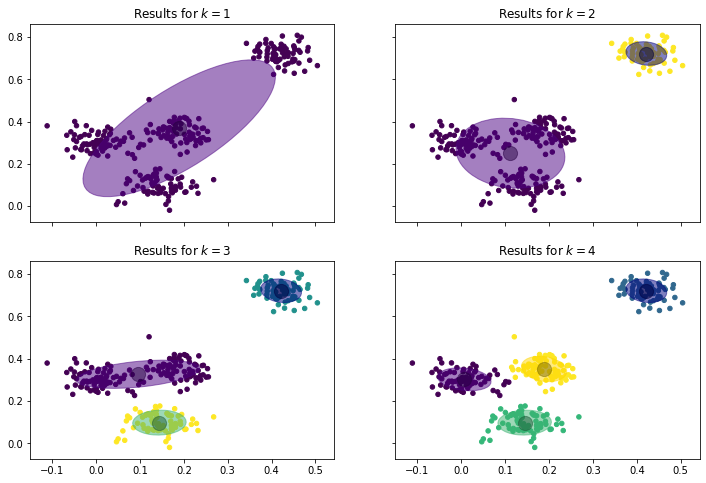

In [18]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

k = range(1,5)
for iter in k:
    em = GaussianMixture(n_components=iter,random_state=rs)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    ax = axes[min(1,max(0, iter-2)), (iter-1)%2]
    ax.set_title('Results for $k=%i$' % iter)
    ax.scatter(X[:, 0], X[:, 1], c=y_em, s=20)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    for n, color in enumerate(colors[0:iter]):
        v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
plt.show()

We can see that a simple normal distribution is not sufficient to describe the data, the covariance of the data with only one cluster is huge. The results for $k=2,3,4$ all seem better. However, only with $k=4$ the clusters seem to have similar covariances. 

There is also an analytic approach for the selection $k$, based on the *Bayesian Information Criterion* (BIC). Similar to the WSS, BIC is a measure for what the algorithm tries to optimize and can be used to determine how different values of $k$ perform with respect to the objective of the clustering algorithm. The EM algorithm maximizes the likelihood, i.e., tries to find distributions such that the data can be explained by the clusters. Formally, this is measured by a likelihood function $\hat{L}(C_1, ..., C_k; X)$ that we have ignored in the discussion of the algorithm so far and that we will also not define in detail here. The likelihood increases, when the clusters are a better explanation for the data. Similar to the WSS, the likelihood usually decreases with more clusters. However, BIC also takes the complexity of the model into account. We mentioned at the beginning, that there are $k' = k(d+d^2)$ parameters if there are $d$ features. [Occam's Razor]() tells us that the simplest explanation is usually correct. This means that if we can achieve a similar likelihood with fewer parameters, we have a simpler explanation and should use this. The more complex information, i.e., more clusters with more parameters, may be overfitting. Based on these ideas, BIC is defined as 
$$BIC = \log(|X|)\cdot k' - 2\cdot \log(\hat{L}(C_1, ..., C_k; X)).$$

Thus, the value increases with more parameters and more training data and decreases if the likelihood increases, i.e., the clusters are a better explanation. Thus, BIC should be minimized. In comparison to WSS, BIC is not monotone but has a minimal value, because BIC increases if the parameters in the model are increasing without an equally strong increase in the likelihood. From this follows that, according to BIC, there is an *optimal* number of clusters that can be automatically determined as the value of $k$ that minimizes BIC. This is demonstrated by the evaluation of BIC for our example.

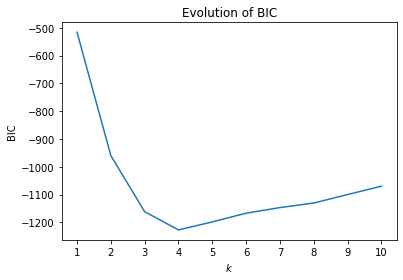

In [19]:
ks=range(1,11)
bic = []
for k in ks:
    em = GaussianMixture(n_components=k,random_state=rs)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    bic.append(em.bic(X))

plt.figure()
plt.title("Evolution of BIC")
plt.plot(ks, bic)
plt.ylabel("BIC")
plt.xlabel("$k$")
plt.xticks(ks)
plt.show()

The minimal value is at $k=4$ meaning that four clusters are the optimal trade-off between number of parameters required to describe the clusters on the one hand, and the likelihood of the cluster result on the other hand. Please note that the actual values of BIC should usually be ignored. Whether BIC is positive or negative, if the values are in the order of $10^2$ or $10^5$ usually depends more on the data than on the quality of the clustering result. Consequently, one could even remove the values from the y-axis of the plot. 

> **Note:**
>
> BIC is derived from the *Akitake Information Criterion* (AIC), which is defind as 
>
> $$AIC = 2\cdot k' - 2\cdot \log(\hat{L}(C_1, ..., C_k; X)).$$
>
> AIC is directly derived from the Kullback-Leibler divergence, an information theoretic measure for the difference between random variables. This is also the reason for the logarithms in the AIC formula and, consequently, the BIC formula. The difference between AIC and BIC is only in the first term, where AIC uses a factor of 2 for the number of parameters and BIC uses the logarithm of the size of the data. 

### Problems of EM Clustering

EM clustering resolves two of the problems of the $k$-Means algorithm: scale effects and the roundness of clusters. The ranges of scales are irrelevant, because this can be covered by the covariances. Similarly, the EM goes beyond round clusters and can describe ellipses, which are more versatile. Otherwise, EM clustering and $k$-Means clustering still share problem. 

- EM clustering is also sensitive to the initialization. Bad initializations may lead to bad clusters, but also to a very slow convergence speed, i.e., many iterations may be required, which can be computationally expensive and the result may not even converge to a solution. A good approach to initialize the EM algorithm is to actually use the centroids of the $k$-Means algorithm. 
- The choice of $k$ may be bad. However, the BIC yields a good approach for finding a suitable value for $k$. Please note that sometimes the optimal value for number of clusters can require too many clusters for a reasonable result. In this case, BIC should be interpreted the same way as WSS by looking for elbows. 
- Shapes that are not ellipsoid usually cannot be clusters by EM, e.g., the half moons could still not be clustered correctly. In general, EM works best for normally distributed data, and may fail for any other kind of data.  

## DBSCAN

### General Idea

So far, we relied on the town halls as reference points for the definition of cities. However, we can also ignore the town halls and just look at the neighbors. Just look outside. The houses that are close to your house are your neighbors and belong to the same city. The neighbors of your neighbors as well. And all neighbors of neighbors of .... of neighbors, until all houses that have a direct or indirect neighborhood relationship are part of the city. This is the concept of *density-based clustering*: regions that are *dense*, i.e., where all points are neighbors of each other, as well as all neighbors of neighbors belong to the same cluster. 

This approach for clustering is fundamentally different from $k$-Means and EM clustering, because we do not have a formula that we can use to determine to which cluster an instance belongs. Instead, the instances themselves define the clusters. Thus, if we want to know to which cluster an instance belongs, we must look at the neighbors. 

The most common density-based clustering algorithm is DBSCAN. The following figure visualizes the results of the DBSCAN clustering of our sample data. 

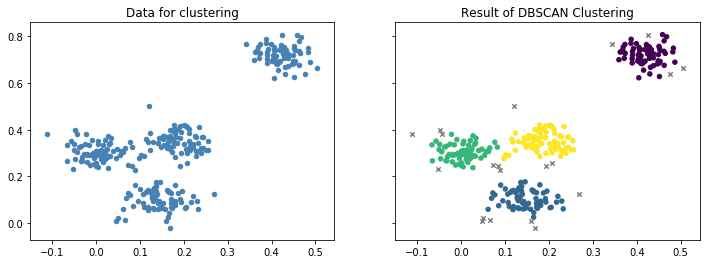

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN

colors = ['indigo', 'navy', 'mediumseagreen', 'gold']

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)


dbscan = DBSCAN(eps=0.03, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20, c='steelblue');

axes[1].set_title('Result of DBSCAN Clustering')
axes[1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

We can see four clusters that are similar to the results of $k$-Means and EM clustering. However, there are also some instances that are marked as grey x. These are *noise*, i.e., instance that do not belong to any cluster. This can happen, if instances are not in a dense neighborhood. This is the same as houses that are outside the boundaries of cities. 

### The Algorithm

The algorithm for DBSCAN requires a concept for what a *dense neighborhood* is. A neighborhood is defined using a distance $\epsilon\in \mathbb{R}$ such that $neighbors(x) = \{x' \in X: d(x, x') \leq \epsilon\}$. A neighborhood is called dense, if it has more than $minPts \in \mathbb{N}$ points. We call all points $x \in X$ that have a dense neighborhood core points. We use the notation $core(C) = \{x \in X: |neighbors(x)| \geq minPts\}$ to denote all core points within a cluster $C \subset X$,  $core(X)$ to denote all core points. 

Once we know all core points, we simply *grow* clusters. We randomly pick a core point and define that this core point belongs to the first cluster. We then add all instances that are neighbors of the core point to the cluster. We repeat this for all core points there were added to the cluster, until we have all neighbors of all core points within the cluster. Then, we pick the next core point that was not yet assigned to a cluster and grow the next cluster. 

1. Set $i=1$, i.e., we are working on the first cluster.
2. Pick a core point that does not yet belong to any cluster and initialize a new cluster, i.e. $x \in core(X) \setminus \bigcup_{j_i} C_j$ and initialize $C_i = \{x\}$ to start a new cluster. 
3. Add all neighbors of core points in $C_i$ to the cluster, i.e., $C_i = \bigcup_{x \in core(C_i)} neighbors(x)$.
4. Repeat step three until no additional points are added. 
5. If there are still core points not yet assigned to a cluster increment $i=i+1$ and go back to step 2. 

The formal explanation of the algorithm is a bit convoluted. How the algorithm works gets clearer when we look at the example. 

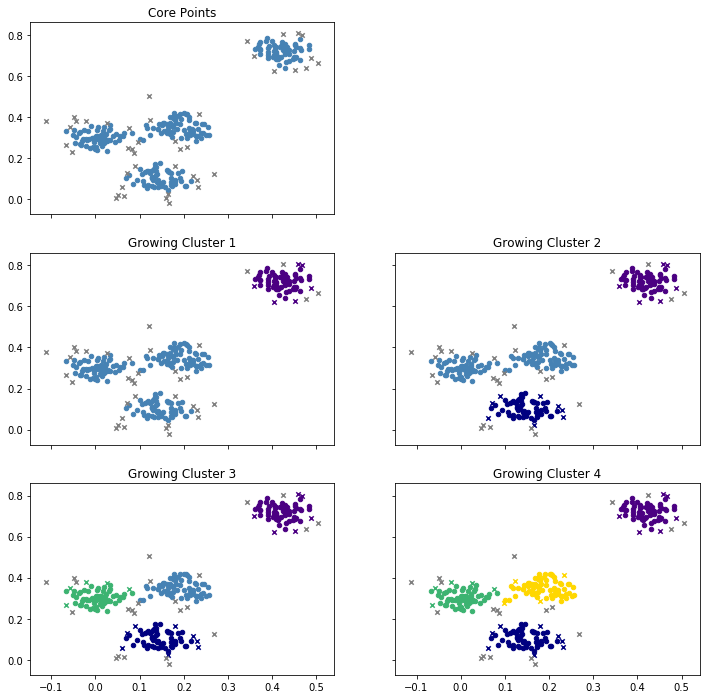

In [3]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

cluster_0_mask = dbscan.labels_==0
cluster_0_core_mask = cluster_0_mask & core_samples_mask
cluster_0_density_connected_mask = cluster_0_mask & ~core_samples_mask

cluster_1_mask = dbscan.labels_==1
cluster_1_core_mask = cluster_1_mask & core_samples_mask
cluster_1_density_connected_mask = cluster_1_mask & ~core_samples_mask

cluster_2_mask = dbscan.labels_==2
cluster_2_core_mask = cluster_2_mask & core_samples_mask
cluster_2_density_connected_mask = cluster_2_mask & ~core_samples_mask

cluster_3_mask = dbscan.labels_==3
cluster_3_core_mask = cluster_3_mask & core_samples_mask
cluster_3_density_connected_mask = cluster_3_mask & ~core_samples_mask

f, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(12, 12))

ax = axes[0,0]
ax.set_title('Core Points')
ax.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~core_samples_mask, 0], X[~core_samples_mask, 1], s=20, marker='x', c='Grey')

axes[0,1].axis('off')

ax = axes[1,0]
ax.set_title('Growing Cluster 1')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[~cluster_0_mask & core_samples_mask, 0], X[~cluster_0_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[1,1]
ax.set_title('Growing Cluster 2')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,0]
ax.set_title('Growing Cluster 3')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

ax = axes[2,1]
ax.set_title('Growing Cluster 4')
ax.scatter(X[cluster_0_core_mask, 0], X[cluster_0_core_mask, 1], s=20, c=colors[0])
ax.scatter(X[cluster_0_density_connected_mask, 0], X[cluster_0_density_connected_mask, 1], s=20, c=colors[0], marker='x')
ax.scatter(X[cluster_1_core_mask, 0], X[cluster_1_core_mask, 1], s=20, c=colors[1])
ax.scatter(X[cluster_1_density_connected_mask, 0], X[cluster_1_density_connected_mask, 1], s=20, c=colors[1], marker='x')
ax.scatter(X[cluster_2_core_mask, 0], X[cluster_2_core_mask, 1], s=20, c=colors[2])
ax.scatter(X[cluster_2_density_connected_mask, 0], X[cluster_2_density_connected_mask, 1], s=20, c=colors[2], marker='x')
ax.scatter(X[cluster_3_core_mask, 0], X[cluster_3_core_mask, 1], s=20, c=colors[3])
ax.scatter(X[cluster_3_density_connected_mask, 0], X[cluster_3_density_connected_mask, 1], s=20, c=colors[3], marker='x')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & core_samples_mask, 1], s=20, c='steelblue')
ax.scatter(X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 0], X[~cluster_0_mask & ~cluster_1_mask & ~cluster_2_mask & ~cluster_3_mask & ~core_samples_mask, 1], s=20, c='Grey', marker='x')

plt.show()

This is what happens:

- At the beginning, all core points are determined. These points will definitively be assigned to a cluster later, because they are in a dense neighborhood. 
- Then, the first cluster is grown. For this, a core point is picked at random. In the example, the initial core point is one of the core points in the top-right cluster. Then all other core points in the region are added, but also some points that are not core points, marked as purple x. These points are in the neighborhood of a core point, but not core points themselves. You may think of these points at the houses at the boundary of a city. There is also some grey x left in the top-right area. These are not in the neighborhood of any core point and will become noise. 
- A new core point is picked randomly to grow a second cluster, this time at the bottom. We see the same thing happening again. All core points in the region, as well as some non-core points are added, marked as blue x. Others are not close enough to any core point and left as noise. 
- This is repeated twice more, first with the green cluster on the left and, finally, with the yellow cluster in the middle. 
- Since all core points are now assigned to one of the four clusters, the DBSCAN algorithm stops. All instances that are still marked with a grey x are noise. 

### Picking $\epsilon$ and $minPts$

An advantage of DBSCAN is that the number of clusters does not have to be defined. Instead, this is automatically determined based on the neighborhoods of the core points. Instead, the two parameters $\epsilon$ and $minPts$ are required, to define what a neighbor is and how many neighbors are required for density. Unsuitable values may lead to bad results. For our example, we used $\epsilon=0.03$ and $minPts=4$. Below are some results that are achieved with other values. 

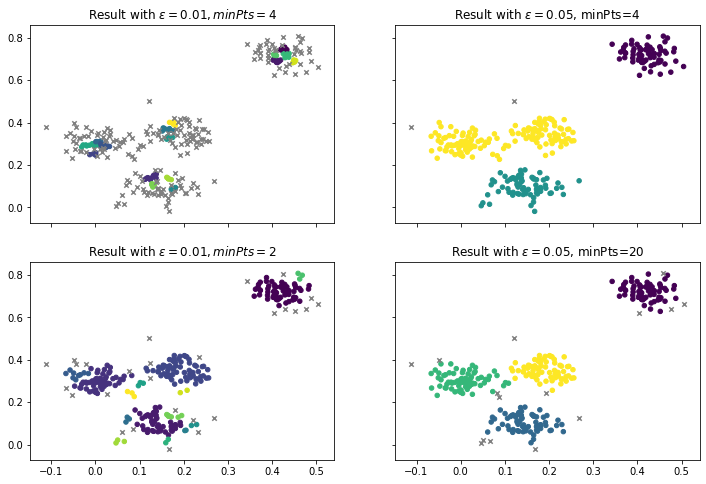

In [66]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 8))

dbscan = DBSCAN(eps=0.01, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[0,0].set_title('Result with $\epsilon=0.01, minPts=4$')
axes[0,0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0,0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

axes[0,1].set_title('Result with $\epsilon=0.05$, minPts=4')
axes[0,1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0,1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.02, min_samples=2)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[1,0].set_title('Result with $\epsilon=0.01, minPts=2$')
axes[1,0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1,0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

dbscan = DBSCAN(eps=0.05, min_samples=20)
dbscan.fit(X)
noise_mask = dbscan.labels_<0

axes[1,1].set_title('Result with $\epsilon=0.05$, minPts=20')
axes[1,1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1,1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

In the first column, we have a very low $\epsilon$ of 0.01. If we keep the minPts at 4, we find no real clusters, i.e., there are almost no core points anymore. When we decrease the minPts to 2, we find clusters again. There are four larger clusters that look similar to our initial result. However, there are also many smaller clusters with only three points. Thus, this is not a good result, because such small clusters usually do not make sense and should either be merged into larger clusters or considered as noise. The second column shows what happens when we use a large $\epsilon$ of 0.05. The results actually look good and similar to our prior results. With minPts at 4, we find the three clusters we can also find with $k=3$ with $k$-Means and EM clustering. When we increase the minPts to 20, we have fewer core points that have larger neighborhoods. This leads to almost the same result as we have with $\epsilon=0.03$ and $minPts=4$, but with less noise. In general, reducing $\epsilon$ will always lead to more and smaller clusters, increasing $\epsilon$ will merge existing clusters. Reducing minPts leads to more clusters, but may also allow very small clusters that do not make sense. Increasing minPts avoids small clusters but can also lead to no clusters or lots of noise if $\epsilon$ is small. Thus, both parameters should always be used together and there is no general rule for their optimization. 

However, there is one analytic tool other than visualizing the clusters that can help to determine good values for $\epsilon$. We can plot how far away the $k$-th nearest neighbor of instances are.

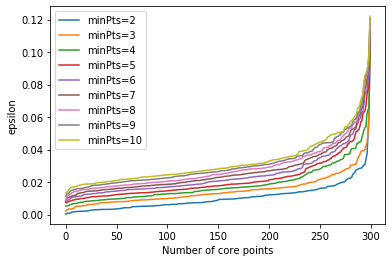

In [62]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
    
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.legend()
plt.show()

Such a plot shows us, how many core points we would have for a combination min. A good value for $\epsilon$ is where the curvature is largest, i.e., where you see that sharpest change of direction in the curve. For example, we see that this is somewhere in the between 0.3 and 0.4 with $minPts=4$. 

### Problems of DBSCAN

While DBSCAN does not have the problem that the number of clusters must be defined by the user and can also find clusters of any shape, there are other aspects of the algorithm that may be problematic. 

- The biggest problem of DBSCAN is that it can be difficult to find good values for $\epsilon$ and $minPts$. Especially if clusters are very close to each other, it can be very difficult to separate the data into two clusters. The reason is that the instances where the clusters are close to each other act as *bridge points* between the clusters. This can only be avoided by using a large value for minPts that decreases the likelihood that points at the border of clusters are core points. However, this means that $\epsilon$ must be relatively high, which can also lead to problems. 
- Another problem is that clusters may have different densities. The example below shows the clustering of circles. With only 100 instances per circle, the data in the outer circle is not very dense in comparison to the inner circle. As a consequence, there are some breaks in the outer circle and it is not detected as a single cluster, but rather as many clusters. When the instances in the outer circle are increased, both clusters are detected correctly. This problem can be quite severe, if every cluster has different densities.

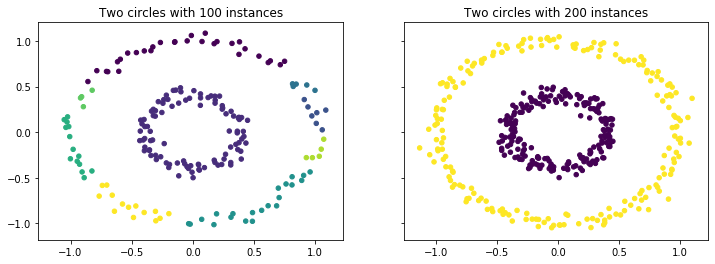

In [84]:
from sklearn.datasets.samples_generator import make_circles

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

X, _ = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=1)
dbscan = DBSCAN(eps=0.15, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[0].set_title('Two circles with 100 instances')
axes[0].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[0].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.4, random_state=1)
dbscan = DBSCAN(eps=0.15, min_samples=4)
dbscan.fit(X)
noise_mask = dbscan.labels_<0
axes[1].set_title('Two circles with 200 instances')
axes[1].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20)
axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
plt.show()

- Consequently, you cannot easily apply DBSCAN to a subsample  of data, because the values for $\epsilon$ and minPts depend on the density of the sample which usually decreases when a subsample is used. 
- DBSCAN is also distance based and as such sensitive to scale effects in the same way as $k$-Means clustering. 

## Single Linkage Clustering

There is another way how cities often grow, i.e., by merging with other cities and villages into a larger city. This is always done by cities that are close to each other. This is the concept of *hierarchical clustering*. The idea is to build clusters by growing them, similar to DBSCAN, but not by considering dense neighborhoods, but instead by merging of existing clusters into larger clusters. The outcome of hierarchical cluster are many different possible cluster results, because the merging of clusters can continue until all instances are in a single cluster. The result of hierarchical clustering may look as follows. 

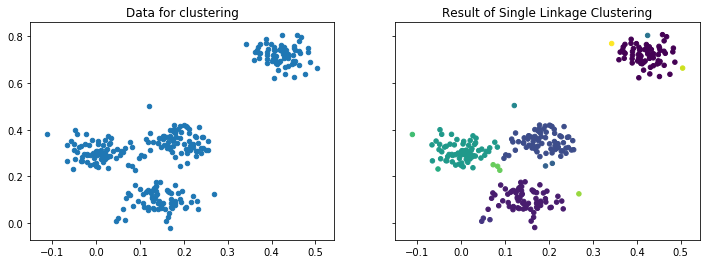

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

eps = 0.03

X, y_true = make_blobs(n_samples=300, centers=4, center_box=(0,1),
                       cluster_std=0.04, random_state=1)

sl = AgglomerativeClustering(n_clusters=None,distance_threshold=0.03,linkage='single', compute_full_tree=True)
sl.fit(X)
y_sl = sl.labels_

f, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
axes[0].set_title('Data for clustering')
axes[0].scatter(X[:, 0], X[:, 1], s=20);
axes[1].set_title('Result of Single Linkage Clustering')
axes[1].scatter(X[:, 0], X[:, 1], c=y_sl, s=20)
plt.show()

The result looks similar to the outcome of the DBSCAN clustering, but there is one key difference. There is no noise, instead there are some very small clusters, some even with only a single instance, e.g., the left-most instance. 

The difference between hierarchical clustering algorithms is how the clusters are determined by merging data. We note that there are also hierarchical clustering algorithms that work the other way around, i.e., by splitting larger clusters into smaller clusters, e.g., *Complete Linkage Clustering*. 

However, in the following, we focus on the *Single Linkage Clustering* (SLINK) algorithm that creates clusters through merging smaller clusters. 


### The SLINK Algorithm

*Single Linkage Clustering* (SLINK) iteratively merges the two clusters that are closest to each other and remembers the clusters and their current level. SLINK starts with every instance in a cluster of their own. Then, clusters are merged based on their distance to each other. The distance of two clusters $C$ and $C'$ is defined as the distance between the two instances in the clusters that are closest to each other, i.e., 

$$d(C, C') = \min_{x\in C, x' \in X'} dist(x, x').$$

Each cluster that is determined by SLINK has a *level*. The level is defined as the distance of the two clusters that are merged. Thus, the level can be seen as the distance between the two cities that are merged. Consequently, a low  level means that the clusters that are combined are not far away from each other, a higher level indicates that there is some gap between the clusters that were merged. 

Based on these ideas, we get a relatively simple algorithm. 

1. Initialize basic clusters $C = \{x\}$ for all $x \in X$ with level $L(C) = 0$.
2. Find the two clusters that are closest to each, i.e., $C, C' = \arg\min_{C, C'} d(C,C')$
3. Merge $C$ and $C'$ into a new cluster $C_{new} = C \cup C'$ with level $L(C_{new}) = d(C, C')$.
4. Repeat steps 2. and 3. until all instance are in one cluster. 

The different clusters and how the result can be interpreted is best evaluated through visualization with a *dendrogram*. 

### Dendrograms

A dendrogram is, in general, the visualization of a tree data structure. For our example, the dendrogram looks as follows. 

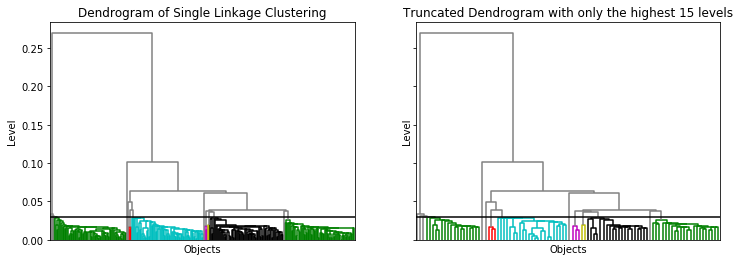

In [8]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

f, axes = plt.subplots(1, 2, sharey=True, sharex=False, figsize=(12, 4))
axes[0].set_title("Dendrogram of Single Linkage Clustering")
axes[0].set_ylabel("Level")
axes[0].set_xlabel("Objects")
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', ax=axes[0])
axes[0].axhline(y=eps, c='k')


axes[1].set_title("Truncated Dendrogram with only the highest 15 levels")
axes[1].set_ylabel("Level")
axes[1].set_xlabel("Objects")
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', p=15, truncate_mode='level', ax=axes[1])
axes[1].axhline(y=eps, c='k')
plt.show()

At the bottom of the dendrogram, we have all the instances, i.e., the clusters of level 0. Each horizontal line connects to clusters into a new cluster. The location of the horizontal lines on the y-axis is the level of the new cluster. For example, the horizontal line at 0.1 combines all instances on the left side of the tree with all instance on the right side of the tree into a new cluster of level 0.1. From this, we also know that the minimal distance of the instance on the left side of that tree to all instances on the right side of that tree is 0.1. The black horizontal line is at 0.03. The colors below indicate the resulting clusters, i.e., the clusters with a level of at most 0.03. The left figure is very dense at the bottom and we basically see large colored regions. This is because we have all instances at the bottom, in this case 300. A trick to make the bottom of the tree "readable" is to drop the *lower layers* of the tree. This means that we do not visualize clusters of all levels, but only the highest levels of clusters. For example, the right figure shows only the 15 highest levels of clusters. This way, we do not see the individual instances at the bottom of the dendrogram, but rather relatively small clusters. As a result, we can see the structure of the dendrogram. 

Working with dendrograms takes some getting used to. However, they provide a great tool to visually determine clusters manually. In the above example, we used a fixed threshold of 0.03 for the merging of clusters. We also see that the black and the green cluster on the right would merge, if we would change this threshold to 0.05. If we choose a cutoff between 0.06 and 0.25, we would get two large clusters. This is a clear advantage of SLINK over DBSCAN, where picking good values for $\epsilon$ and minPts can be quite difficult.

### Problems of SLINK

- The biggest problem of SLINK (and hierarchical clustering in general) is the scalability for large data sets. The standard algorithms require a square matrix of the distances between all instances. For 100,000 instances, this matrix already requires 4 Gigabyte of storage, even if we only store the upper triangle of the matrix. Thus, the application of hierarchical clustering is usually limited to smaller data sets and this approach is not suitable for big data. 
- Hierarchical clustering has the same problems as DBSCAN with respect to different densities. However, it is easier to find a good cutoff, that separates the different clusters. For example, for the circles we see directly from the dendrogram that any cutoff between 0.2 and 0.4 works to find the correct clusters. 

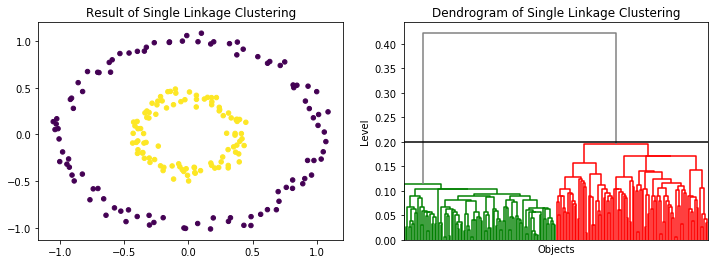

In [25]:
from sklearn.datasets.samples_generator import make_circles

X, _ = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=1)

eps=0.2

sl = AgglomerativeClustering(n_clusters=None,distance_threshold=eps,linkage='single', compute_full_tree=True)
sl.fit(X)
y_sl = sl.labels_

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Result of Single Linkage Clustering')
axes[0].scatter(X[:, 0], X[:, 1], c=y_sl, s=20)

axes[1].set_title("Dendrogram of Single Linkage Clustering")
axes[1].set_ylabel("Level")
axes[1].set_xlabel("Objects")
plot_dendrogram(sl,color_threshold=eps, no_labels=True, above_threshold_color='grey', ax=axes[1])
axes[1].axhline(y=eps, c='k')
plt.show()

- Bridge points between clusters can also have a stronger effect on SLINK than on DBSCAN. The reason is that DBSCAN and SLINK yield the same clusters, if minPts is set to 1. Then, the threshold for the level becomes the same as $\epsilon$. However, this means that using a higher value of minPts to mitigate problems with the merging of clusters due to bridge points between two clusters points cannot be used with SLINK clustering.
- SLINK may lead to many very small clusters, because all instances start in a cluster on their own. If they are outliers, they will still get a cluster, which may make the results hard to interpret. DBSCAN uses the minPts and the noise to mitigate this. 
- SLINK is also distance based and as such sensitive to scale effects in the same way as $k$-Means clustering.

## Comparison of the Clustering Algorithms

We already partially compared the clustering algorithms above, especially how some algorithms work around the problems of other algorithms, but also which problems they share. In the final part of this chapter, we compare the algorithms directly. 

### Cluster Shapes

First, we consider the outcome of the clustering with good parameters on data sets with clusters of different shapes. Below, we see the results for our running example, as well as the circles and half-moons we used to show problems before. 

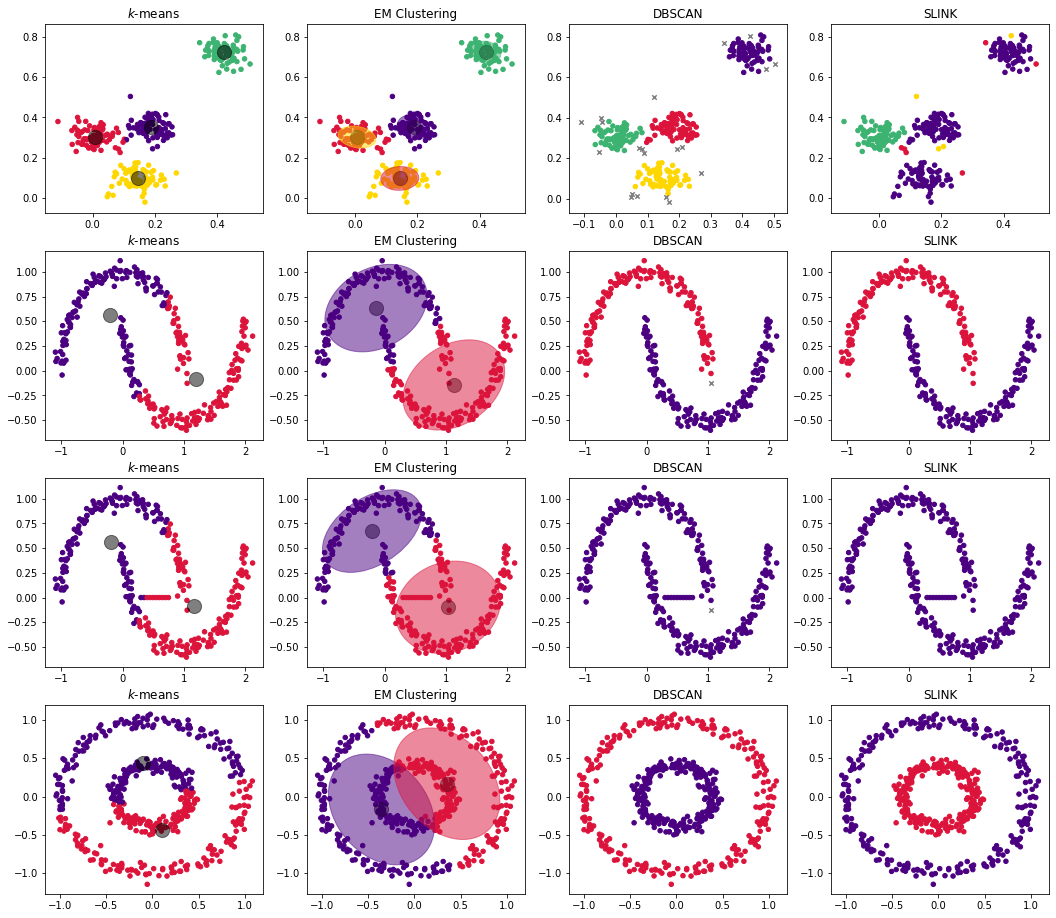

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

titles = ['Blobs', 'Halfmoons', 'Circles', 'different densities']
datasets = [make_blobs(n_samples=300, centers=4, center_box=(0,1),cluster_std=0.04, random_state=1),
            make_moons(n_samples=300, noise=0.05, random_state=0),
            (np.append(make_moons(n_samples=300, noise=0.05, random_state=0)[0], [[0.3,0],[0.35,0], [0.4,0], [0.45,0], [0.5,0], [0.55,0], [0.6,0], [0.65,0], [0.7,0], [0.75,0]], axis=0),None),
            make_circles(n_samples=500, noise=0.05, factor=0.4, random_state=1)]

k = [4,2,2,2]
eps = [0.03,0.15,0.15,0.15]


f, axes = plt.subplots(4, 4, figsize=(18, 16))

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    
    colors = ['indigo', 'gold', 'mediumseagreen', 'crimson']
    
    cmap = ListedColormap(colors, name="cmap_points")
    colors = ['indigo', 'crimson', 'mediumseagreen', 'gold']
    
    kmeans = KMeans(n_clusters=k[ds_cnt], random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    
    ax = axes[ds_cnt, 0]
    ax.set_title('$k$-means')
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap=cmap)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    dbscan = DBSCAN(eps=eps[ds_cnt], min_samples=4)
    dbscan.fit(X)
    noise_mask = dbscan.labels_<0
    
    ax = axes[ds_cnt, 2]
    ax.set_title('DBSCAN')
    ax.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=dbscan.labels_[~noise_mask], s=20, cmap=cmap)
    ax.scatter(X[noise_mask, 0], X[noise_mask, 1], c='Grey', s=20, marker='x')
    
    em = GaussianMixture(n_components=k[ds_cnt],random_state=0)
    em.fit(X)
    y_em = em.predict(X)
    centers = em.means_
    
    ax = axes[ds_cnt, 1]
    ax.set_title('EM Clustering')
    ax.scatter(X[:, 0], X[:, 1], c=y_em, s=20, cmap=cmap)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    for n, color in enumerate(colors[:k[ds_cnt]]):
        v, w = np.linalg.eigh(em.covariances_[n][:2,:2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(em.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        
    sl = AgglomerativeClustering(n_clusters=None,distance_threshold=eps[ds_cnt],linkage='single', compute_full_tree=True)
    sl.fit(X)
    y_sl = sl.labels_

    ax = axes[ds_cnt, 3]
    ax.set_title('SLINK')
    ax.scatter(X[:, 0], X[:, 1], c=y_sl, s=20, cmap=cmap)
plt.show()


We can see that on relatively simple data, like our running example, all algorithms yield good results and the choice of the clustering algorithm does not matter much. However, there are small differences at the boundaries of the clusters, e.g., the seemingly random borders between green and purple for $k$-Means and EM clustering, the noise for DBSCAN, and the small clusters for SLINK. 

The second row shows the results for the half-moons. We see what we already discussed above: $k$-Means can only find more or less circular clusters and EM ellipsoid clusters. Thus, both fail on that data and the clusters do not make sense. DBSCAN and SLINK work well, because they build their clusters on pair-wise neighborship of instances, which works with any shape of clusters, as long there is a gap between the clusters. This can be broken by a "bridge" between the two moons is demonstrated in the third row. 

The fourth row demonstrates that while $k$-Means and EM clustering work in general for round shapes, it is also important that these round shapes are not within each other. If we have a circle within a circle, this is also not correctly identified by the clustering.

### Number of Clusters

Another strength of DBSCAN and SLINK clustering is that they can determine the number of clusters automatically, just by knowing the definition of core points, respectively the maximum level. EM clustering also provides good support to determine the number of clusters with the BIC, which has a minimal value that is optimal. The WSS may be used for $k$-Means, but looking for elbows in a plot is very fuzzy and requires a high expertise by the data scientists.

### Execution Time

While the cluster results are certainly important, the execution time can also be a factor. Below are the results of the execution time of clustering data with 20 features for 10,000, 100,000, 1,000,000, 10,000,000, and 100,000,000 instances, i.e. up to about 15 Gigabytes of data. Please note that we omit SLINK from this comparison, because it already crashes with 100,000 instances. The measurements are done with a normal laptop (Intel Core i7-8850 @ 2.60GHz, 32 GB RAM) with scikit-learn 0.22. 

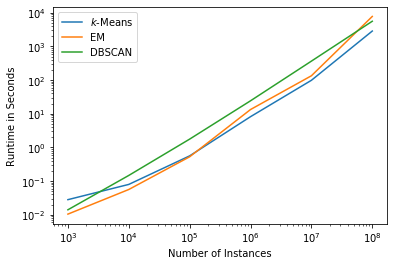

In [30]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

import timeit

names = ["$k$-Means",
         "EM",
         "DBSCAN"]

clusters = [
    KMeans(n_clusters=4, random_state=0),
    GaussianMixture(n_components=4,random_state=0, warm_start=False),
    DBSCAN(eps=0.01, min_samples=4)]


instances = [1e3,1e4,1e5,1e6,1e7,1e8]
runtime = [[],[],[]]
for num_instances in instances:
    X, _ = make_blobs(n_samples=int(num_instances), centers=4, center_box=(0,1),cluster_std=0.04, random_state=1, n_features=20)
    X = StandardScaler().fit_transform(X)
    for cl_cnt, cl in enumerate(clusters):
        start_time = timeit.default_timer()
        cl.fit(X)
        elapsed = timeit.default_timer() - start_time
        times_fit.append(elapsed)
        runtime[cl_cnt].append(elapsed)
        
plt.figure()
plt.plot(instances, runtime[0], label=names[0])
plt.plot(instances, runtime[1], label=names[1])
plt.plot(instances, runtime[2], label=names[2])
plt.xticks(instances)
plt.ylabel('Runtime in Seconds')
plt.xlabel('Number of Instances')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

We can see that the runtime of all three algorithms is comparable, even though DBSCAN is a bit slower. We note that this also depends on the data set. Sparse data, dense data, or strange distributions may alter these estimations. However, in general runtime is not a major concern for the selection of one of these clustering algorithms. 

### Explanatory Value and Concise Representation

A key advantage of $k$-Means clustering and EM clustering is that they provide a concise mathematical representation that describes each cluster, i.e., the centers and the normal distributions, respectively. This is a great tool for data scientist for the interpretation of the meaning of clusters. Moreover, the concise representation can be be implemented elsewhere to assign instances to clusters, without the need to apply the clustering again. 

DBSCAN and SLINK both do not provide a mathematical representation of the clusters. Instead, the clusters are only described by the instances themselves. This also hinders the interpretation, which can almost only be done visually. SLINK supports this better, because of the dendrograms which give an overview of the distances between the clusters. 

### Categorical Features

Categorical features are a general problem for all of the clustering algorithms discussed above. For $k$-Means, DBSCAN, and SLINK the reason is that they are based on distance measures. However, by definition, the distance between different categories is unknown. Thus, we cannot compute reasonable distances. While there is no good solution for DBSCAN and SLINK, there is the option to use $k$-Modes clustering, which is the same as $k$-Means, but with the mode instead of the arithmetic mean. 

The reason for EM clustering with normal distributions is similar. There is no meaningful way to describe categorical data with a continuous distribution. The solution is to use EM clustering with discrete distributions, e.g., a multinomial distribution. 

### Missing Features

None of the algorithms works if there are missing feature values, i.e., an incomplete description of an instance. Thus, either the missing instance or the missing feature must be discarded. Alternatively, feature imputation may be used to guess the value of the feature (e.g., [Barnard and Meng, 1999](https://doi.org/10.1177%2F096228029900800103)). 

### Correlated Features

Correlated features are also problematic for all algorithms, but especially for the distance-based approaches. An extreme example would be if you have twice almost the same feature, e.g., the normalized age in years and the normalized age in days. Normalized means that the values of the feature are rescaled to be in the interval $[0,1]$. The values of both features will not be identical, because years are coarser than days, but they will be very similar and effectively we only have one feature age. In the distance measure the age would be used twice and, consequently, have disproportional influence on the distance. The more correlations there are in the data, the stronger the potential negative effect gets. 

EM clustering can, in principle, deal with the correlations, because they can be represented by the covariances. However, there is still the problem that the clusters get unnecessarily complex, which may skew the BIC and lead to a wrong estimation of a good number of clusters. The reason for this is that the covariance matrix grows quadratically and the model complexity is needlessly penalized by BIC if there are correlated features. 


### Summary

The following two tables summarizes the different strengths and weaknesses of the clustering algorithms. 

|  []()         | Cluster Shape | Cluster Number | Runtime | Explanatory Value | Concise Representation | 
|---------------|---------------|----------------|---------|-------------------|------------------------|
| $k$-Means     | -             | -              | o       | +                 | +                      |
| EM Clustering | o             | o              | o       | +                 | +                      |
| DBSCAN        | +             | +              | o       | -                 | -                      |
| SLINK         | +             | o              | o       | +                 | -                      |

|  []()         | Categorical Features | Missing Features | Correlated Features |
|---------------|----------------------|------------------|---------------------|
| $k$-Means     | -                    | -                | -                   |
| EM Clustering | -                    | -                | o                   |
| DBSCAN        | -                    | -                | -                   |
| SLINK         | -                    | -                | -                   |